# Пользовательские настройки делений на осях координат

Локаторы и форматеры делений на осях, используемые по умолчанию в библиотеке Matplotlib, спроектированы так, что в большинстве обычных ситуаций их вполне достаточно, хотя они отнюдь не оптимальны для всех графиков. В этом разделе мы рассмотрим несколько примеров настройки расположения делений и их форматирования для конкретных интересующих нас видов графиков.

Прежде чем перейти к примерам, следует разобраться в объектной иерархии графиков библиотеки Matplotlib. Matplotlib старается делать объектами языка Python все элементы на графике, например объект figure — ограничивающий снаружи все элементы графика прямоугольник. Каждый объект библиотеки Matplotlib также служит контейнером подобъектов. Например, любой объект figure может содержать
один объект axes или более, каждый из которых, в свою очередь, содержит другие объекты, отражающие содержимое графика.

Метки делений не исключение. У каждого объекта axes имеются атрибуты xaxis и yaxis, которые, в свою очередь, содержат все свойства линий, делений и меток оси координат.

## Основные и промежуточные деления осей координат

На каждой оси координат имеются основные и промежуточные метки делений. Основные деления обычно больше или более заметны, а промежуточные — меньше. По умолчанию библиотека Matplotlib редко использует промежуточные деления, но одно из мест, где их можно увидеть, — логарифмические графики:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

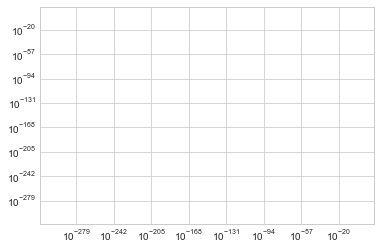

In [2]:
ax = plt.axes(xscale='log', yscale='log')

Можно задать пользовательские настройки для этих свойств делений (расположений и меток), задав значения объектов formatter и locator каждой из осей. Рассмотрим их значения для оси X на графике:


In [5]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

Мы видим, что расположение меток как основных, так и промежуточных делений задает локатор LogLocator (что логично для логарифмического графика). Метки промежуточных делений форматируются форматером NullFormatter (это означает, что метки отображаться не будут).
Продемонстрируем несколько примеров настройки этих локаторов и форматеров для различных графиков.

## Прячем деления и/или метки

Наиболее частая операция с делениями/метками — скрывание делений или меток с помощью классов plt.NullLocator() и plt.NullFormatter():

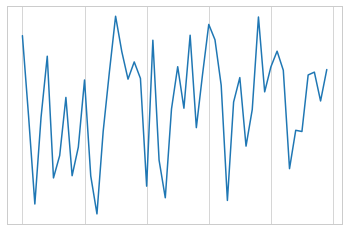

In [6]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Обратите внимание, что мы убрали метки (но оставили деления/линии координатной сетки) с оси X, и убрали деления (а следовательно, и метки) с оси Y. Отсутствие делений может быть полезно во многих случаях, например, если нужно отобразить сетку изображений.

Например, рассмотрим рисунок, содержащий изображения лиц людей, — пример, часто используемый в задачах машинного обучения с учителем (более подробную информацию вы можете найти в разделе «Заглянем глубже: метод опорных векторов» главы 5):

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\RusancovS\scikit_learn_data


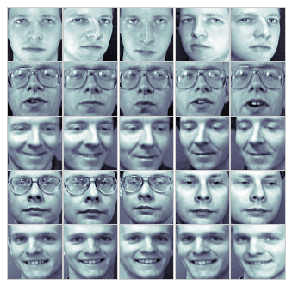

In [11]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# получаем данные по лицам людей из библиотеки scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

Обратите внимание, что у каждого изображения — отдельная система координат и мы сделали локаторы пустыми, поскольку значения делений (в данном случае количество пикселов) не несут никакой относящейся к делу информации.

## Уменьшение или увеличение количества делений

Распространенная проблема с настройками по умолчанию — то, что метки на маленьких субграфиках могут оказаться расположенными слишком близко друг к другу.

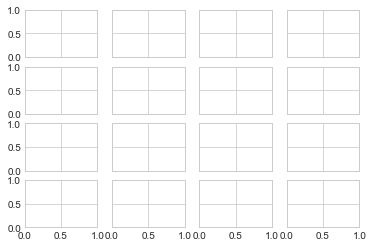

In [12]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Числа практически накладываются друг на друга, особенно в делениях на оси X, из-за чего их очень сложно разобрать. Исправить это можно с помощью класса plt.MaxNLocator(), который дает возможность задавать максимальное отображаемое количество делений. При задании этого числа конкретные местоположения делений выберет внутренняя логика библиотеки Matplotlib:

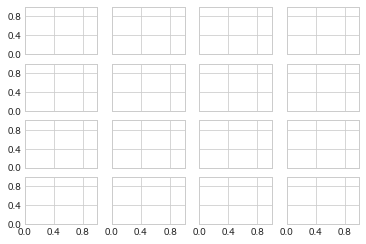

In [15]:
# Задаем, для всех систем координат, локаторы основных делений осей X и Y
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

Благодаря этому рисунок становится гораздо понятнее. При необходимости еще более точного контроля расположения делений с равными интервалами можно воспользоваться классом plt.MultipleLocator, который мы обсудим в следующем разделе.

## Более экзотические форматы делений

Форматирование делений, используемое по умолчанию в библиотеке Matplotlib, оставляет желать лучшего. В качестве варианта по умолчанию, который бы подходил для широкого спектра ситуаций, оно работает неплохо, но иногда требуется нечто большее.

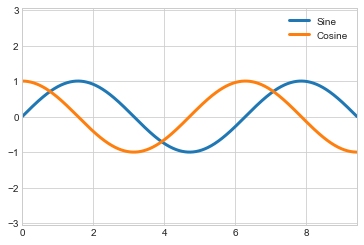

In [18]:
# Строим графики синуса и косинуса
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Настраиваем сетку, легенду и задаем пределы осеф координат
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3*np.pi);

Хотелось бы внести несколько изменений. Во-первых, для такого рода данных лучше располагать деления и линии сетки по кратным числу π точках. Сделать это можно путем задания локатора MultipleLocator, располагающего деления в точках, кратных переданному ему числу. В дополнение добавим промежуточные деления в точках, кратных π/4:

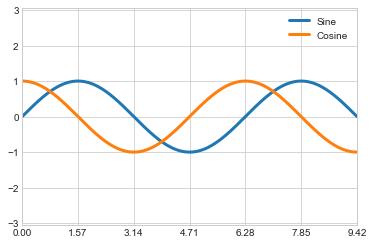

In [20]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

Но теперь эти метки делений выглядят несколько по-дурацки: можно догадаться, что они кратны π, но из десятичного представления сразу это непонятно. Необходимо модифицировать форматер деления. Встроенного форматера для нашей задачи нет, поэтому мы воспользуемся форматером plt.FuncFormatter, принимающим на входе пользовательскую функцию, обеспечивающую более точный контроль за форматом вывода делений:

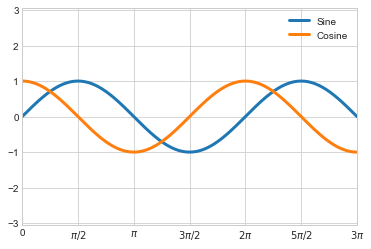

In [21]:
def format_func(value, tick_number):
    # Определяем количество кратных пи/2 значений [в требуемом диапазоне]
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return 0
    elif N == 1:
        return r'$\pi/2$'
    elif N == 2:
        return r'$\pi$'
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

Намного лучше! Обратите внимание: мы воспользовались тем, что библиотека Matplotlib поддерживает систему верстки LaTeX. Для ее использования необходимо заключить нужную строку в знаки доллара с двух сторон. Это облегчает отображение математических символов и формул. В нашем случае "$\pi$" визуализируется в виде греческой буквы π.

Форматер plt.FuncFormatter обеспечивает возможность чрезвычайно тонкого контроля внешнего вида делений графика и очень удобен при подготовке графиков для презентаций или публикации.